In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import dataimport

In [4]:
data = dataimport.Dataimport("rawData/tidy.csv","rawData/Metadata.csv")

In [19]:
df = data.dataframe()

In [20]:
df

,R.FileName,uniprot,meanAbu,Cancer
0,J_D201211_MDIA_P705_SExp01-BGSID-1_R01,A0A075B6H9,1.160140e+04,Lung Cancer
1,J_D201211_MDIA_P705_SExp01-BGSID-1_R01,A0A075B6I0,3.827467e+03,Lung Cancer
2,J_D201211_MDIA_P705_SExp01-BGSID-1_R01,A0A075B6I1,1.141158e+05,Lung Cancer
3,J_D201211_MDIA_P705_SExp01-BGSID-1_R01,A0A075B6I7,4.293525e+03,Lung Cancer
4,J_D201211_MDIA_P705_SExp01-BGSID-1_R01,A0A075B6J1,5.969786e+03,Lung Cancer
...,...,...,...,...
614245,J_D210111_MDIA_P705_SExp01-BGSID-147_R01_X01,Q9Y6L6,7.580687e+03,Healthy
614246,J_D210111_MDIA_P705_SExp01-BGSID-147_R01_X01,Q9Y6N7,5.907860e+04,Healthy
614247,J_D210111_MDIA_P705_SExp01-BGSID-147_R01_X01,Q9Y6R7,5.091396e+06,Healthy
614248,J_D210111_MDIA_P705_SExp01-BGSID-147_R01_X01,Q9Y6Y9,1.520328e+04,Healthy


In [21]:
print('Total rows in the dataset:  \n',df.count())
for name in df.columns:
    if len(df[name].unique()) < 5:
        print(name ,
          '\n',
          ' Labels: ',
          df[name].unique(),
          ' Unique labels: ',
          len(df[name].unique()))
    else:
                print(name ,
          '\n',
          ' Unique labels: ',
          len(df[name].unique()))

Total rows in the dataset:  
 R.FileName    614250
uniprot       614250
meanAbu       614250
Cancer        494130
dtype: int64
R.FileName 
  Unique labels:  225
uniprot 
  Unique labels:  2730
meanAbu 
  Unique labels:  609391
Cancer 
  Unique labels:  7


### We want to check if our dataset has balanced data

In [22]:
def countplot(columnname):
    datanew = df[columnname].astype('category')
    datanew.value_counts().plot(kind='bar') # Equal set size for both columns used

<AxesSubplot:>

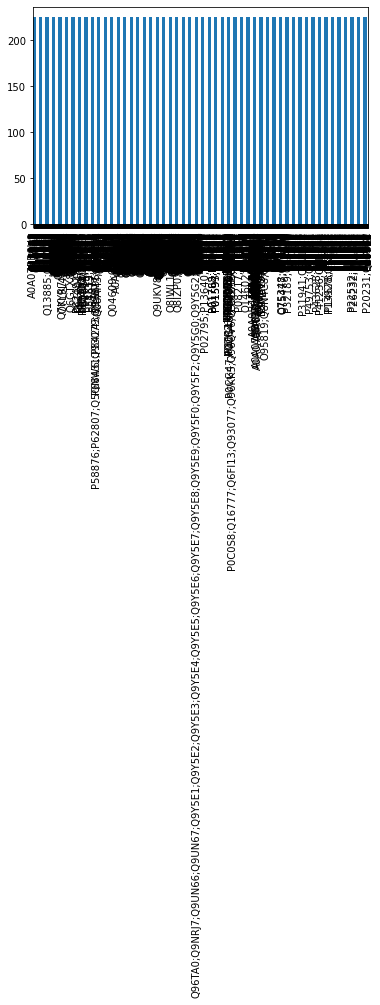

In [27]:
df.uniprot.value_counts().plot(kind='bar') # Equal set size for proteins

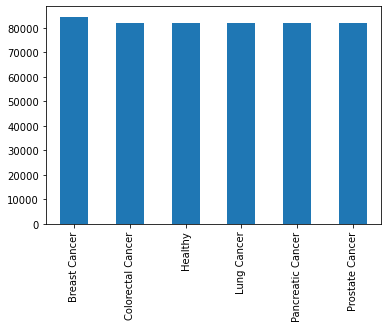

In [31]:
countplot('Cancer') # Almost equal sizes for the cancer types and healthy


In [56]:
new = data.iloc[:, 1:3].groupby(['proteinName', 'Group']).size()

In [57]:
new[:30]

proteinName                                                       Group                 
(E3-independent) E2 ubiquitin-conjugating enzyme                  Healthy                   2
                                                                  Lung Cancer 1 Adeno       2
                                                                  Lung Cancer 2 Squamous    2
                                                                  Prostate Cancer           2
1,4-alpha-glucan-branching enzyme                                 Healthy                   2
                                                                  Lung Cancer 1 Adeno       2
                                                                  Lung Cancer 2 Squamous    2
                                                                  Prostate Cancer           2
1-phosphatidylinositol 4,5-bisphosphate phosphodiesterase beta-2  Healthy                   2
                                                                 

In [61]:
data.Group.value_counts()

Healthy                   5030
Lung Cancer 1 Adeno       5030
Lung Cancer 2 Squamous    5030
Prostate Cancer           5030
Name: Group, dtype: int64

In [63]:
data.proteinName.count()

20120

In [65]:
new.groupby('Group').value_counts()

Group                    
Healthy                 2    1271
                        4     622
Lung Cancer 1 Adeno     2    1271
                        4     622
Lung Cancer 2 Squamous  2    1271
                        4     622
Prostate Cancer         2    1271
                        4     622
dtype: int64

In [66]:
# 622 Proteins have 4 samples per Group, 1271 Proteins have 2 samples per Group

([<matplotlib.axis.YTick at 0x131d72520>,
 [Text(0, 0, 'uniprot'),
  Text(0, 1, 'proteinName'),
  Text(0, 2, 'Group'),
  Text(0, 3, 'status'),
  Text(0, 4, 'Column'),
  Text(0, 5, 'meanAbu'),
  Text(0, 6, 'log10meanAbu'),
  Text(0, 7, 'stdDev'),
  Text(0, 8, 'relStdDev'),
  Text(0, 9, 'Rank'),
  Text(0, 10, 'conc_thpa_ugl'),
  Text(0, 11, 'mars14'),
  Text(0, 12, 'sepromix20'),
  Text(0, 13, 'organism'),
  Text(0, 14, 'fastaSequence'),
  Text(0, 15, 'pI'),
  Text(0, 16, 'chargeAtpH8'),
  Text(0, 17, 'molecularWeight'),
  Text(0, 18, 'aromaticity'),
  Text(0, 19, 'hydrophobicity')])

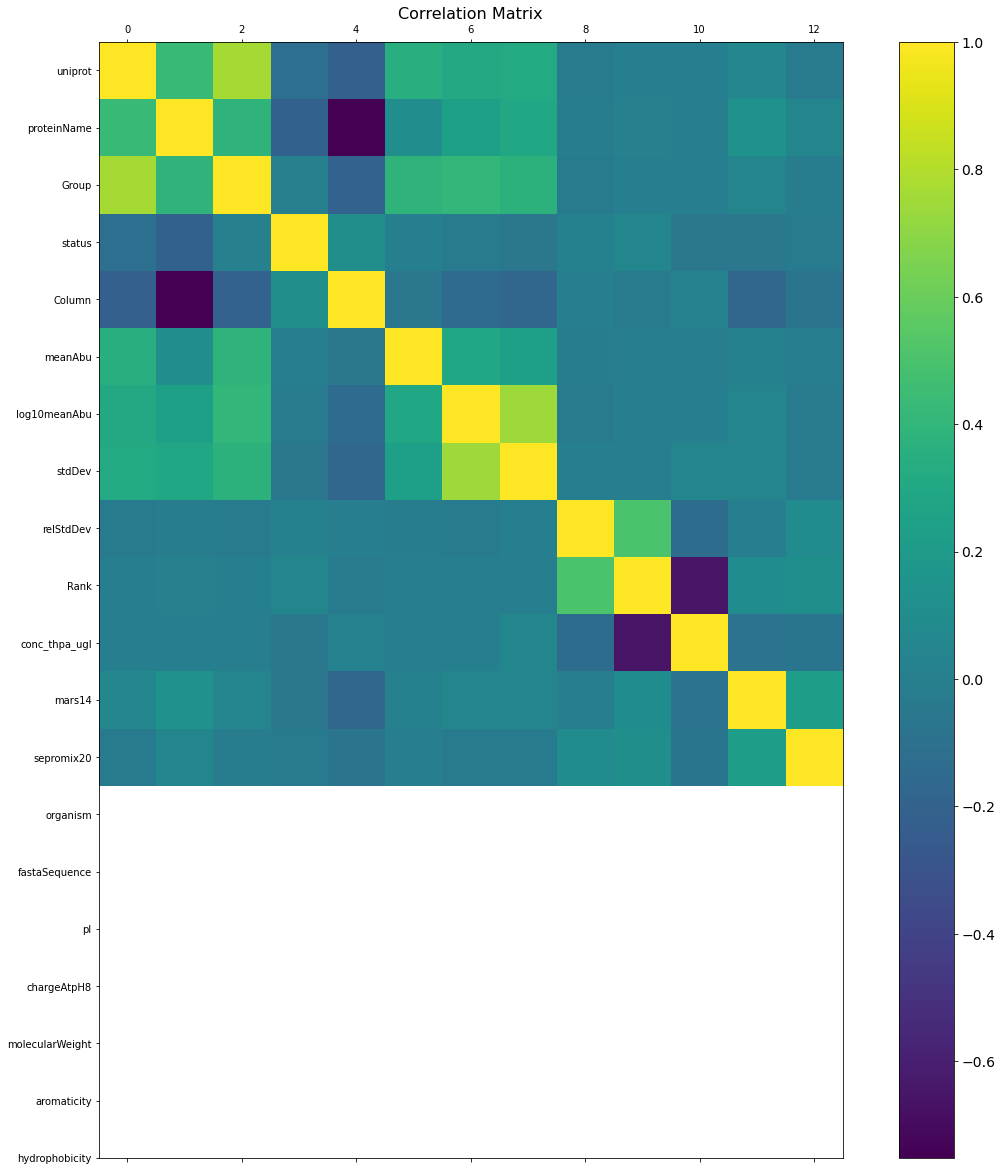

In [80]:
f = plt.figure(figsize=(20,20))
plt.matshow(data.corr(), fignum= f.number)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16)


<AxesSubplot:>

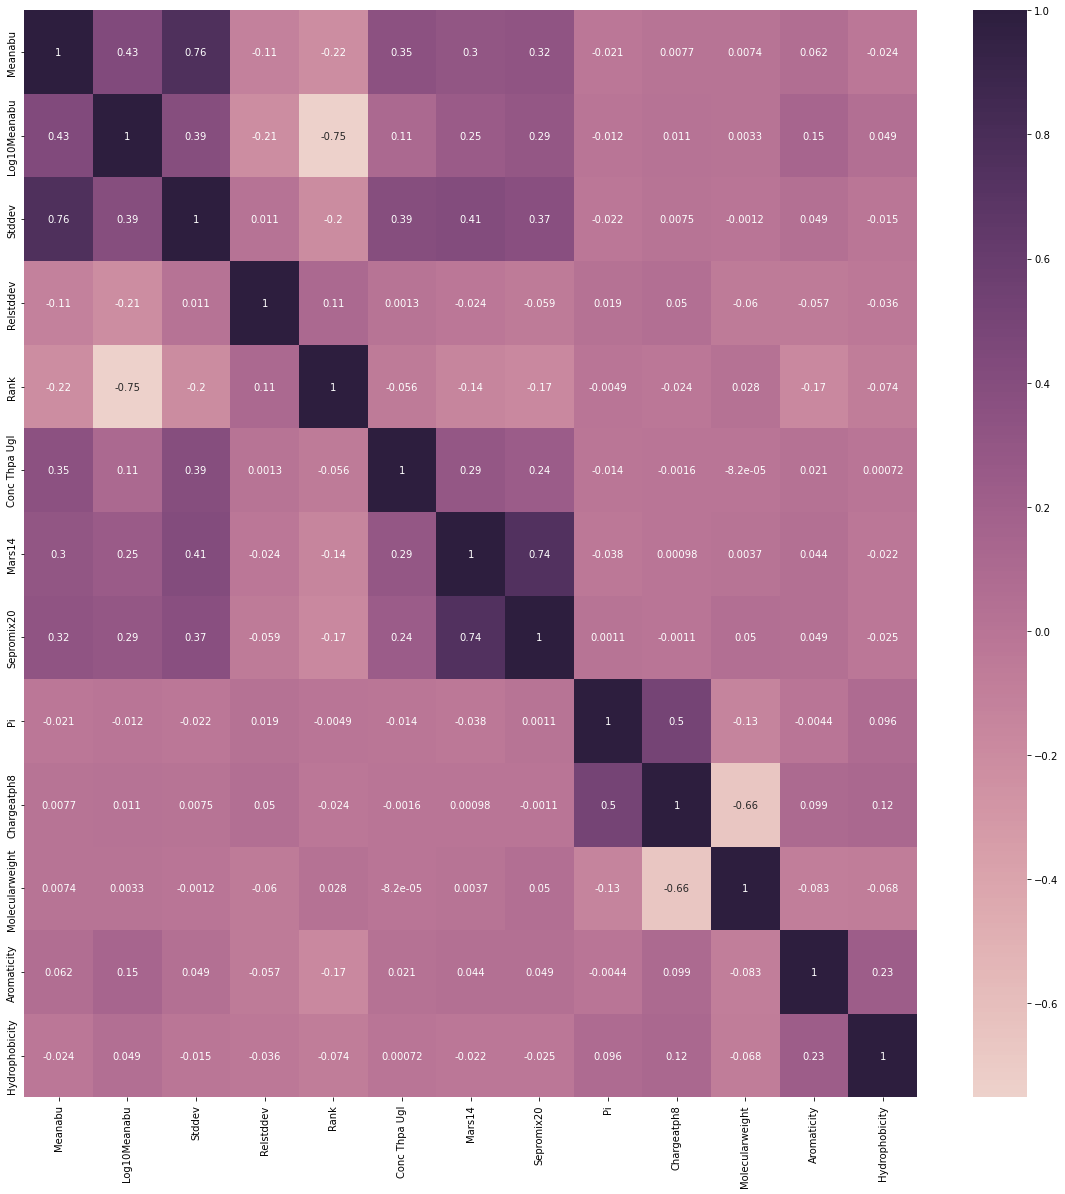

In [86]:
import seaborn as sns

h_labels = [x.replace('_', ' ').title() for x in 
            list(data.select_dtypes(include=['number', 'bool']).columns.values)]

fig, ax = plt.subplots(figsize=(20,20))
sns.heatmap(data.corr(),
            annot=True,
            cmap=sns.cubehelix_palette(as_cmap=True),
            xticklabels=h_labels, yticklabels=h_labels,
            ax=ax)